# <h1> Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# pip install covid19dh

In [2]:
from covid19dh import covid19
data, src = covid19(verbose = False) 

# <h1> Dane globalne </h1>
## <h1> 1. Eksploracyjna analiza danych. </h1>

In [3]:
data.shape

(187695, 47)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187695 entries, 64444 to 26916
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   id                                   187695 non-null  object        
 1   date                                 187695 non-null  datetime64[ns]
 2   confirmed                            171268 non-null  float64       
 3   deaths                               155287 non-null  float64       
 4   recovered                            70222 non-null   float64       
 5   tests                                77596 non-null   float64       
 6   vaccines                             47584 non-null   float64       
 7   people_vaccinated                    45271 non-null   float64       
 8   people_fully_vaccinated              42902 non-null   float64       
 9   hosp                                 32656 non-null   float64      

In [5]:
data.describe()

,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,...,economic_support_index,administrative_area_level,administrative_area_level_2,administrative_area_level_3,latitude,longitude,population,iso_numeric,key_local,key_nuts
count,1.712680e+05,155287.000000,7.022200e+04,7.759600e+04,4.758400e+04,4.527100e+04,4.290200e+04,32656.000000,30842.000000,5464.000000,...,150372.000000,187695.0,0.0,0.0,183973.000000,183973.000000,1.868640e+05,186466.000000,0.0,0.0
mean,7.316840e+05,14765.754120,5.473697e+05,1.883836e+07,4.729172e+07,1.777233e+07,1.439103e+07,5956.853013,760.748168,525.002379,...,38.421880,1.0,NaN,NaN,17.918278,14.775913,3.368119e+07,432.094473,NaN,NaN
std,3.625369e+06,61527.156703,2.200565e+06,7.082709e+07,2.365690e+08,7.424058e+07,6.101470e+07,34803.727454,2377.559749,717.578238,...,32.627322,0.0,NaN,NaN,24.084552,70.825883,1.348355e+08,250.958730,NaN,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,1.0,NaN,NaN,-51.750000,-176.200000,5.000000e+01,4.000000,NaN,NaN
25%,2.294000e+03,67.000000,2.918500e+03,3.200905e+05,3.023472e+05,1.782455e+05,1.250132e+05,94.000000,17.000000,36.000000,...,0.000000,1.0,NaN,NaN,3.919300,-24.000000,5.437670e+05,218.000000,NaN,NaN
50%,2.340600e+04,599.000000,2.633000e+04,1.802352e+06,2.853241e+06,1.660504e+06,1.257354e+06,621.000000,96.000000,194.000000,...,37.500000,1.0,NaN,NaN,16.750000,17.873900,5.750433e+06,430.000000,NaN,NaN
75%,2.417740e+05,5112.000000,2.184820e+05,8.989695e+06,1.598455e+07,8.042890e+06,6.856199e+06,2861.750000,514.000000,798.250000,...,62.500000,1.0,NaN,NaN,39.000000,47.576900,2.167000e+07,643.000000,NaN,NaN
max,8.127604e+07,992033.000000,3.097475e+07,8.692301e+08,3.345524e+09,1.284935e+09,1.249688e+09,875258.000000,28891.000000,4077.000000,...,100.000000,1.0,NaN,NaN,64.963100,178.065000,1.392730e+09,894.000000,NaN,NaN


In [6]:
data.head(10)

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
64444,0094b645,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64445,0094b645,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64446,0094b645,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64447,0094b645,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64448,0094b645,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64449,0094b645,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64450,0094b645,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64451,0094b645,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64452,0094b645,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
64453,0094b645,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA


Nasze dane wydaja sie zawierac bardzo duza liczbe NaN'ow - brakow danych. Sprawdzmy to.

In [7]:
print(f'Nasze dane zawieraja {data.isnull().sum().sum() / data.size * 100:.2f}% brakow.')

Nasze dane zawieraja 32.55% brakow.


In [9]:
print('Ilosci brakow danych dla kazdej z kolumn: \n')
data.isnull().sum().sort_values(ascending = False)

Ilosci brakow danych dla kazdej z kolumn: 



administrative_area_level_2            187695
key_nuts                               187695
administrative_area_level_3            187695
key_local                              187695
vent                                   182231
icu                                    156853
hosp                                   155039
people_fully_vaccinated                144793
people_vaccinated                      142424
vaccines                               140111
key_apple_mobility                     132662
recovered                              117473
tests                                  110099
key_google_mobility                     76444
government_response_index               37423
containment_health_index                37368
elderly_people_protection               37340
contact_tracing                         37334
economic_support_index                  37323
stringency_index                        37302
information_campaigns                   37282
gatherings_restrictions           

In [10]:
print('Procentowe braki danych dla kazdej z kolumn: \n')
round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)

Procentowe braki danych dla kazdej z kolumn: 



key_local                              100.00
key_nuts                               100.00
administrative_area_level_3            100.00
administrative_area_level_2            100.00
vent                                    97.09
icu                                     83.57
hosp                                    82.60
people_fully_vaccinated                 77.14
people_vaccinated                       75.88
vaccines                                74.65
key_apple_mobility                      70.68
recovered                               62.59
tests                                   58.66
key_google_mobility                     40.73
government_response_index               19.94
containment_health_index                19.91
elderly_people_protection               19.89
contact_tracing                         19.89
economic_support_index                  19.88
stringency_index                        19.87
testing_policy                          19.86
information_campaigns             

Text(0.5, 1.0, 'Bar chart - the number of NON - missing values')

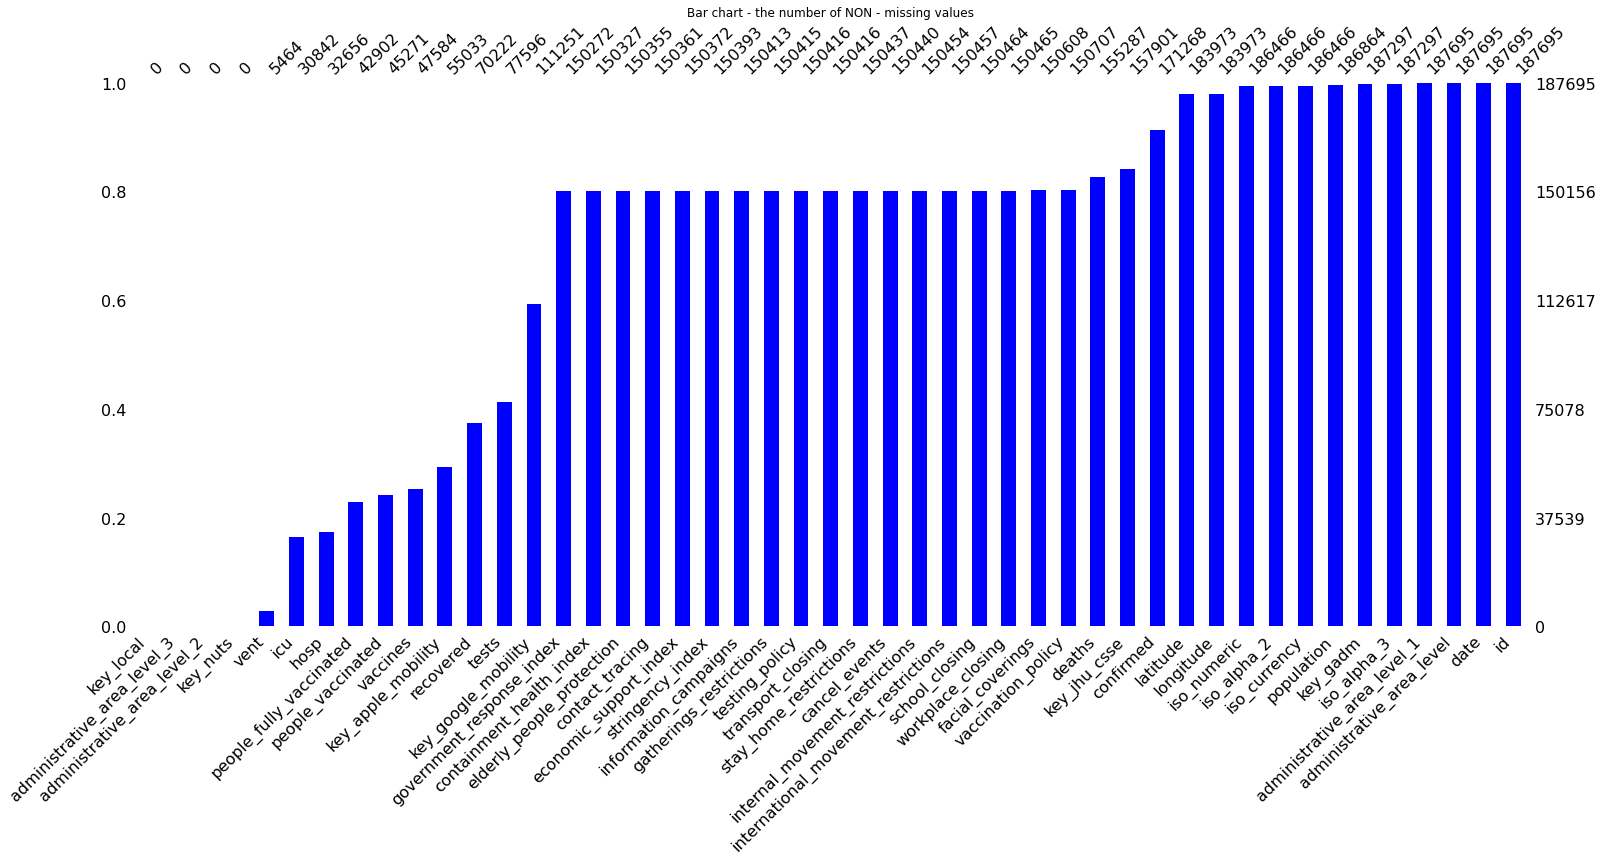

In [11]:
msno.bar(data, color = 'blue', sort = 'ascending')
plt.title('Bar chart - the number of NON - missing values')

Text(0.5, 1.0, 'Correlation between the number of missing values in different columns as a heatmap.')

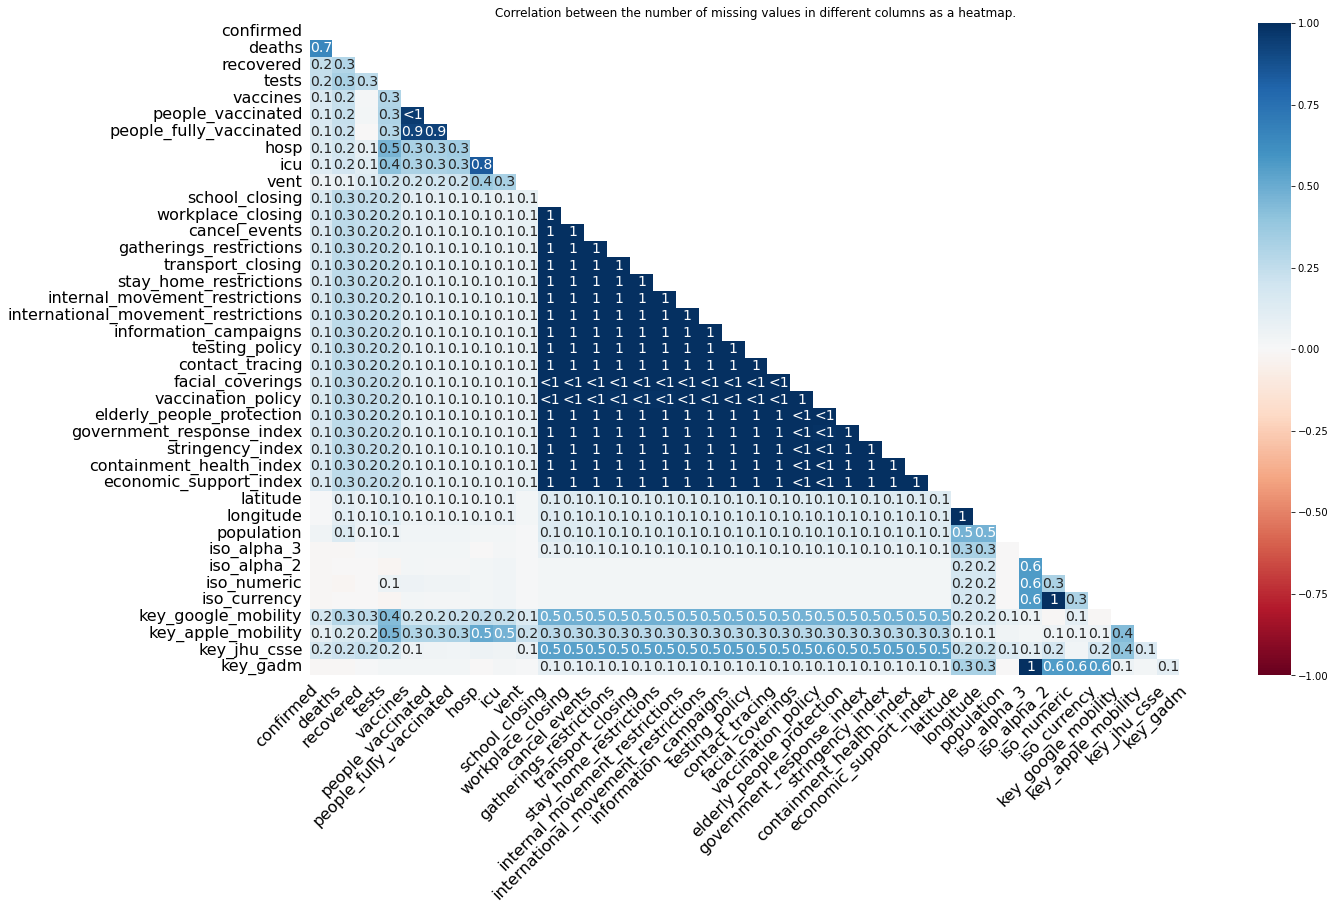

In [12]:
msno.heatmap(data)
plt.title('Correlation between the number of missing values in different columns as a heatmap.')

Na podstawie powyzszych badan widzimy 100% braki w danych dla kolumn **key_local, administrative_area_level_3, administrative_area_level_2 oraz key_nuts.** Mysle, ze mozemy podjac decyzje o ich **usunieciu bez poglebionej analizy ze wzgledu na niski wklad w nasze modele** - kolumny dotycza raczej identyfikatorow obszarow administracyjnych itp.

Powyzsze kolumny odrzucilem ze wzgledu na wysoka zawartosc brakow danych. Nastepnie usuwam pozostale zmienne "Administrative areas": administrative_area_level_1, administrative_area_level. Kolejne zmienne, ktore znikna z naszedo datasetu sa to zmienne grupy ISO codes: iso_alpha_3, iso_numeric, iso_currency oraz cala grupa External Keys. Wymienione zmienne uwazam, ze maja niski wklad w predykcje liczby zgonow lub zachorowan - sa to zmienne jak np. waluty danego kraju, identyfikatory dla urzadzen firmy Apple lub z systemem Android, administracyjne zwiazane z regionem itd. **Wykonajmy wiec kopie danych z wydzielonymi juz kolumnami do dalszej pracy.**

In [82]:
data_copy = data[list(data.columns[np.r_[:30, 34:36, 38]])]

print('Kolumny, ktore zostaly pozostawione do dalszej analizy: ')
data_copy.columns

Kolumny, ktore zostaly pozostawione do dalszej analizy: 


Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index', 'latitude',
       'longitude', 'iso_alpha_2'],
      dtype='object')

In [83]:
data_copy.head(10)

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,economic_support_index,latitude,longitude,iso_alpha_2
64444,0094b645,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64445,0094b645,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64446,0094b645,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64447,0094b645,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64448,0094b645,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64449,0094b645,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64450,0094b645,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64451,0094b645,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64452,0094b645,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC
64453,0094b645,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9094,-60.9789,LC


Sprawdzmy, jak zmienil sie rozmiar naszych danych.

In [93]:
print(f'Ksztalt danych po zmianie: {data_copy.shape}, dlugosc: {len(data_copy)}, rozmiar: {data_copy.size}')
print(f'Ksztalt danych przed zmiana: {data.shape}, dlugosc: {len(data)}, rozmiar: {data.size}')
print(f'Usunelismy {43-33} kolumn, nasz zbior danych zmniejszyl sie o {(data.size - data_copy.size) / data.size * 100:.2f}%')

Ksztalt danych po zmianie: (187695, 33), dlugosc: 187695, rozmiar: 6193935
Ksztalt danych przed zmiana: (187695, 47), dlugosc: 187695, rozmiar: 8821665
Usunelismy 10 kolumn, nasz zbior danych zmniejszyl sie o 29.79%


Narysujmy teraz nasza macierz korelacji (dolnotrojkatna).

<AxesSubplot:>

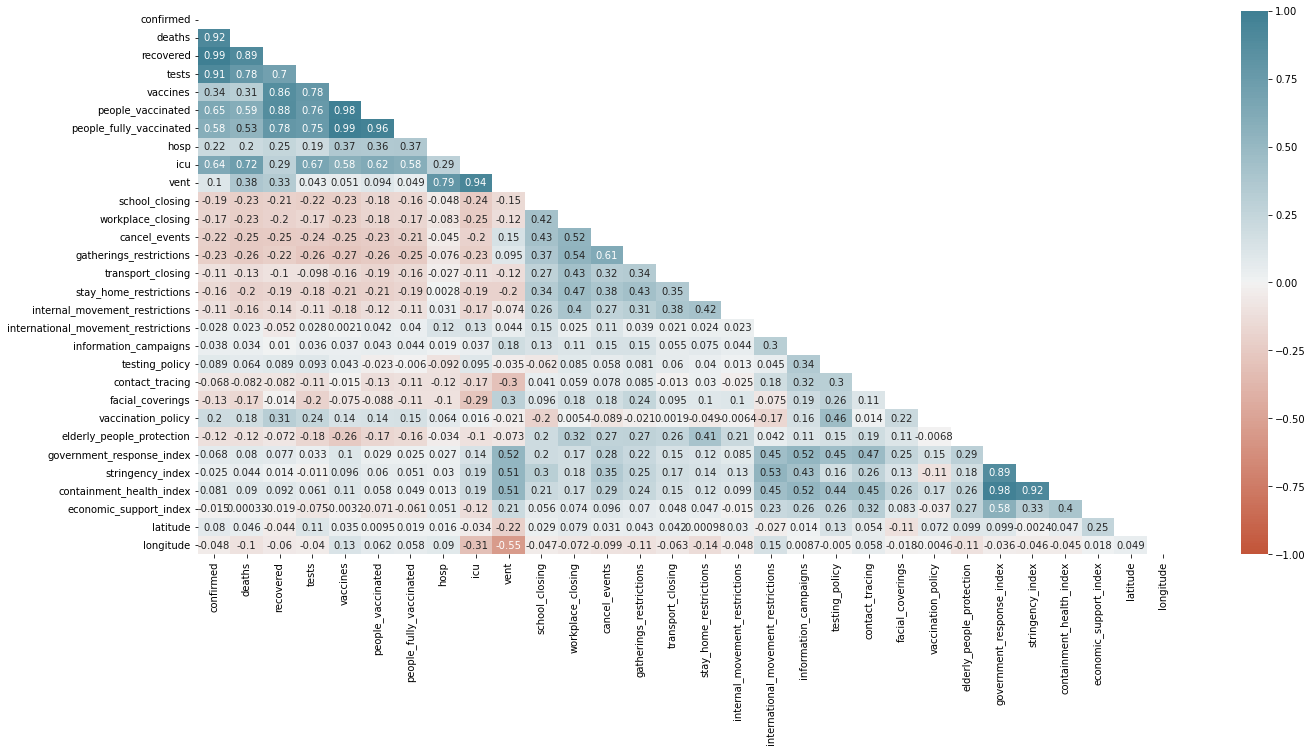

In [103]:
corr = data_copy.corr()

f, ax = plt.subplots(figsize=(22, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1, annot = True)

# <h1> 2. Predykcja globalnej liczby zachorowan. </h1>
Dla lepszej widocznosci (ze wzgledu na duza liczbe zmiennych) wyswietlmy wspolczynniki korelacji tylko dla liczby zachorowan.

In [113]:
corr.sort_values('confirmed', ascending = False)['confirmed']

confirmed                              1.000000
recovered                              0.991680
deaths                                 0.916520
tests                                  0.909645
people_vaccinated                      0.648994
icu                                    0.636102
people_fully_vaccinated                0.583474
vaccines                               0.344591
hosp                                   0.217991
vaccination_policy                     0.195800
vent                                   0.100174
testing_policy                         0.088803
containment_health_index               0.081260
latitude                               0.079501
government_response_index              0.068331
information_campaigns                  0.037735
international_movement_restrictions    0.028054
stringency_index                       0.024507
economic_support_index                -0.014740
longitude                             -0.048233
contact_tracing                       -0

Zmienne recovered, deaths, tests, people_vaccinated, icu, people_fully_vaccinated maja dosc dobre wspolczynniki korelacji - wezmiemy je pod uwage przy tworzeniu modeli ML. Utworzmy w tym celu pomocnicza ramke danych.

In [137]:
data_copy_1 = data_copy[['date', 'confirmed', 'recovered', 'deaths', 'tests', 'people_vaccinated', 'people_fully_vaccinated', 'icu']].reset_index(drop = True)
data_copy_1.head(10)

,date,confirmed,recovered,deaths,tests,people_vaccinated,people_fully_vaccinated,icu
0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
